In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/11_Nov.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,20.000000,81.000000,1,4,1,1943.0,1963.0,2051.0,1852.0,1803.0,1981.0,1951.416667,1867.0
1,19.916667,81.000000,1,4,1,1889.0,1975.0,2036.0,1828.0,1781.0,1976.0,1933.750000,1824.0
2,19.833333,81.000000,1,4,1,1901.0,1990.0,2012.0,1764.0,1755.0,1935.0,1916.750000,1808.0
3,19.750000,81.000000,1,4,1,1887.0,1977.0,1977.0,1802.0,1760.0,1941.0,1902.416667,1805.0
4,19.666667,81.000000,2,4,1,1867.0,1943.0,1963.0,1788.0,1740.0,1913.0,1888.916667,1801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,13.432452,78.354324,23,7,0,1672.0,1762.0,1868.0,1657.0,1676.0,1644.0,1709.083333,1600.0
8636,13.432452,78.354324,24,7,0,1634.0,1746.0,1826.0,1630.0,1645.0,1619.0,1687.833333,1571.0
8637,13.432452,78.354324,24,7,0,1643.0,1722.0,1801.0,1613.0,1620.0,1603.0,1666.500000,1545.0
8638,13.100000,78.354324,24,7,0,1608.0,1699.0,1796.0,1598.0,1594.0,1583.0,1645.916667,1549.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head(105)
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.192358,0.176626,0.786924,-1.660891,-0.040920,0.644431,0.486783,0.563242,0.903753,0.109198,-0.099057,0.549998,0.543020
1,0.025040,0.155615,0.786924,-1.660891,-0.040920,0.644431,0.276706,0.609900,0.845471,0.016713,-0.182786,0.531081,0.471132
2,-0.037218,0.134603,0.786924,-1.660891,-0.040920,0.644431,0.323390,0.668224,0.752219,-0.229913,-0.281738,0.375961,0.401957
3,-0.048891,0.113592,0.786924,-1.660891,-0.040920,0.644431,0.268926,0.617677,0.616227,-0.083479,-0.262709,0.398661,0.343633
4,-0.064456,0.092580,0.786924,-1.516446,-0.040920,0.644431,0.191119,0.485477,0.561830,-0.137428,-0.338826,0.292725,0.288700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-0.605322,-0.033488,1.158387,-1.516446,0.468006,0.644431,-0.011177,0.590459,0.577372,-0.087332,-0.156145,-0.361806,0.206979
101,-0.620887,-0.054500,1.177938,-1.516446,0.468006,0.644431,-0.221254,0.458259,0.592914,-0.206792,-0.293156,-0.463959,0.100843
102,-0.694818,-0.075511,1.197489,-1.516446,0.468006,0.644431,-0.190131,0.376606,0.658968,-0.253034,-0.289350,-0.448825,-0.017501
103,-0.601431,-0.096523,1.217040,-1.516446,0.468006,0.644431,-0.271828,0.302729,0.686166,-0.306984,-0.296962,-0.524493,-0.130080


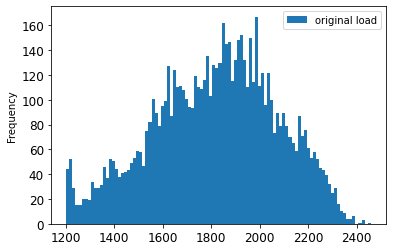

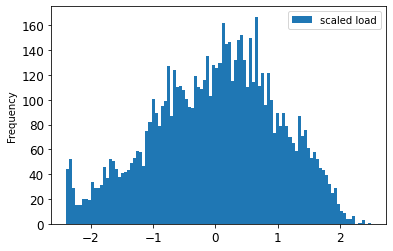

In [9]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

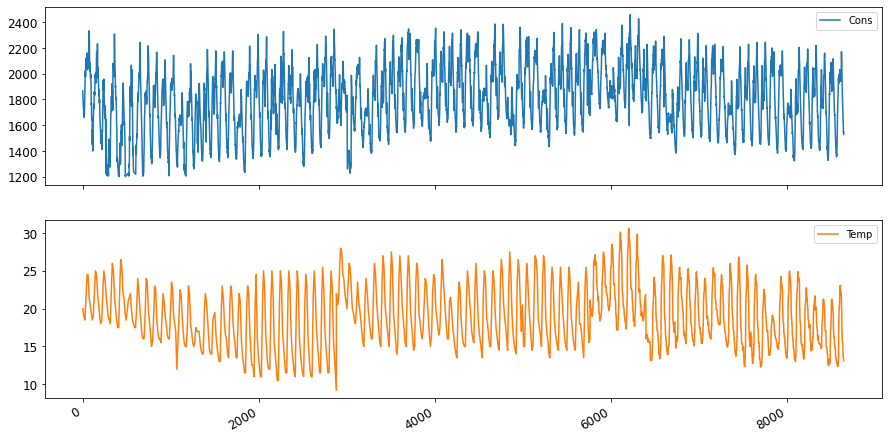

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,0.192358,0.176626,0.786924,-1.660891,-0.04092,0.644431,0.486783,0.563242,0.903753,0.109198,-0.099057,0.549998,0.543020,-0.605322
1,0.025040,0.155615,0.786924,-1.660891,-0.04092,0.644431,0.276706,0.609900,0.845471,0.016713,-0.182786,0.531081,0.471132,-0.620887
2,-0.037218,0.134603,0.786924,-1.660891,-0.04092,0.644431,0.323390,0.668224,0.752219,-0.229913,-0.281738,0.375961,0.401957,-0.694818
3,-0.048891,0.113592,0.786924,-1.660891,-0.04092,0.644431,0.268926,0.617677,0.616227,-0.083479,-0.262709,0.398661,0.343633,-0.601431
4,-0.064456,0.092580,0.786924,-1.516446,-0.04092,0.644431,0.191119,0.485477,0.561830,-0.137428,-0.338826,0.292725,0.288700,-0.636451
5,-0.185081,0.071569,0.786924,-1.516446,-0.04092,0.644431,0.023836,0.275512,0.608456,-0.276155,-0.441585,0.205707,0.219186,-0.683145
6,-0.231774,0.050558,0.786924,-1.516446,-0.04092,0.644431,-0.038409,0.322171,0.666739,-0.272302,-0.426361,0.152739,0.140516,-0.667580
7,-0.286250,0.029546,0.786924,-1.516446,-0.04092,0.644431,-0.050080,0.267735,0.616227,-0.280009,-0.502479,0.073287,0.061508,-0.725947
8,-0.348508,0.008535,0.786924,-1.372000,-0.04092,0.644431,-0.065641,0.189971,0.484121,-0.322398,-0.551955,0.039236,-0.011397,-1.080039
9,-0.410766,-0.012477,0.786924,-1.372000,-0.04092,0.644431,-0.186241,0.022776,0.274304,-0.380201,-0.601431,-0.021298,-0.071417,-1.430241


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,0.192358,0.176626,0.786924,-1.660891,-0.04092,0.644431,0.486783,0.563242,0.903753,0.109198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192358
1,0.025040,0.155615,0.786924,-1.660891,-0.04092,0.644431,0.276706,0.609900,0.845471,0.016713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192358,0.025040
2,-0.037218,0.134603,0.786924,-1.660891,-0.04092,0.644431,0.323390,0.668224,0.752219,-0.229913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192358,0.025040,-0.037218
3,-0.048891,0.113592,0.786924,-1.660891,-0.04092,0.644431,0.268926,0.617677,0.616227,-0.083479,...,NaN,NaN,NaN,NaN,NaN,NaN,0.192358,0.025040,-0.037218,-0.048891
4,-0.064456,0.092580,0.786924,-1.516446,-0.04092,0.644431,0.191119,0.485477,0.561830,-0.137428,...,NaN,NaN,NaN,NaN,NaN,0.192358,0.025040,-0.037218,-0.048891,-0.064456
5,-0.185081,0.071569,0.786924,-1.516446,-0.04092,0.644431,0.023836,0.275512,0.608456,-0.276155,...,NaN,NaN,NaN,NaN,0.192358,0.025040,-0.037218,-0.048891,-0.064456,-0.185081
6,-0.231774,0.050558,0.786924,-1.516446,-0.04092,0.644431,-0.038409,0.322171,0.666739,-0.272302,...,NaN,NaN,NaN,0.192358,0.025040,-0.037218,-0.048891,-0.064456,-0.185081,-0.231774
7,-0.286250,0.029546,0.786924,-1.516446,-0.04092,0.644431,-0.050080,0.267735,0.616227,-0.280009,...,NaN,NaN,0.192358,0.025040,-0.037218,-0.048891,-0.064456,-0.185081,-0.231774,-0.286250
8,-0.348508,0.008535,0.786924,-1.372000,-0.04092,0.644431,-0.065641,0.189971,0.484121,-0.322398,...,NaN,0.192358,0.025040,-0.037218,-0.048891,-0.064456,-0.185081,-0.231774,-0.286250,-0.348508
9,-0.410766,-0.012477,0.786924,-1.372000,-0.04092,0.644431,-0.186241,0.022776,0.274304,-0.380201,...,0.192358,0.025040,-0.037218,-0.048891,-0.064456,-0.185081,-0.231774,-0.286250,-0.348508,-0.410766


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-0.414657,-0.033488,0.786924,-1.372000,-0.04092,0.644431,-0.232925,-0.039436,0.320930,-0.411029,...,0.025040,-0.037218,-0.048891,-0.064456,-0.185081,-0.231774,-0.286250,-0.348508,-0.410766,-0.414657
11,-0.441895,-0.054500,0.786924,-1.372000,-0.04092,0.644431,-0.287389,-0.051100,0.266533,-0.438004,...,-0.037218,-0.048891,-0.064456,-0.185081,-0.231774,-0.286250,-0.348508,-0.410766,-0.414657,-0.441895
12,-0.461351,-0.075511,0.786924,-1.227555,-0.04092,0.644431,-0.349634,-0.066653,0.188824,-0.507367,...,-0.048891,-0.064456,-0.185081,-0.231774,-0.286250,-0.348508,-0.410766,-0.414657,-0.441895,-0.461351
13,-0.500262,-0.086017,0.806475,-1.227555,-0.04092,0.644431,-0.411879,-0.187189,0.021748,-0.545903,...,-0.064456,-0.185081,-0.231774,-0.286250,-0.348508,-0.410766,-0.414657,-0.441895,-0.461351,-0.500262
14,-0.492480,-0.096523,0.826025,-1.227555,-0.04092,0.644431,-0.415770,-0.233848,-0.040420,-0.561317,...,-0.185081,-0.231774,-0.286250,-0.348508,-0.410766,-0.414657,-0.441895,-0.461351,-0.500262,-0.492480


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 10 to 7100
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  7091 non-null   float64
 1   Temp           7091 non-null   float64
 2   Hum            7091 non-null   float64
 3   A              7091 non-null   float64
 4   B              7091 non-null   float64
 5   C              7091 non-null   float64
 6   D              7091 non-null   float64
 7   E              7091 non-null   float64
 8   F              7091 non-null   float64
 9   G              7091 non-null   float64
 10  H              7091 non-null   float64
 11  I              7091 non-null   float64
 12  J              7091 non-null   float64
 13  y_t+100        7091 non-null   float64
 14  Cons_t-10      7091 non-null   float64
 15  Cons_t-9       7091 non-null   float64
 16  Cons_t-8       7091 non-null   float64
 17  Cons_t-7       7091 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.134515
11,-0.963306
12,-1.266813
13,-1.624797
14,-1.613123
...,...
7096,-0.332943
7097,-0.457459
7098,-0.438004
7099,-0.574193


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-0.414657,-0.414657,-0.410766,-0.348508,-0.286250,-0.231774,-0.185081,-0.064456,-0.048891,-0.037218,...,-1.372000,-0.040920,0.644431,-0.232925,-0.039436,0.320930,-0.411029,-0.593819,-0.040216,-0.135845
11,-0.441895,-0.441895,-0.414657,-0.410766,-0.348508,-0.286250,-0.231774,-0.185081,-0.064456,-0.048891,...,-1.372000,-0.040920,0.644431,-0.287389,-0.051100,0.266533,-0.438004,-0.666131,-0.021298,-0.197899
12,-0.461351,-0.461351,-0.441895,-0.414657,-0.410766,-0.348508,-0.286250,-0.231774,-0.185081,-0.064456,...,-1.227555,-0.040920,0.644431,-0.349634,-0.066653,0.188824,-0.507367,-0.631878,-0.089400,-0.254866
13,-0.500262,-0.500262,-0.461351,-0.441895,-0.414657,-0.410766,-0.348508,-0.286250,-0.231774,-0.185081,...,-1.227555,-0.040920,0.644431,-0.411879,-0.187189,0.021748,-0.545903,-0.628072,-0.078050,-0.300644
14,-0.492480,-0.492480,-0.500262,-0.461351,-0.441895,-0.414657,-0.410766,-0.348508,-0.286250,-0.231774,...,-1.227555,-0.040920,0.644431,-0.415770,-0.233848,-0.040420,-0.561317,-0.727025,-0.134801,-0.340318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,-0.227883,-0.227883,-0.099476,0.040604,0.098971,0.258507,0.336330,0.379132,0.429717,0.569797,...,1.516907,0.468006,0.644431,0.257255,0.567130,0.888211,-0.106600,-0.144727,-0.119667,0.339225
7097,-0.282359,-0.282359,-0.227883,-0.099476,0.040604,0.098971,0.258507,0.336330,0.379132,0.429717,...,1.516907,0.468006,0.644431,0.097752,0.427153,0.744448,-0.098893,-0.175174,-0.115884,0.249365
7098,-0.313488,-0.313488,-0.282359,-0.227883,-0.099476,0.040604,0.098971,0.258507,0.336330,0.379132,...,1.516907,0.468006,0.644431,0.039397,0.376606,0.721135,-0.137428,-0.209427,-0.123451,0.158827
7099,-0.395201,-0.395201,-0.313488,-0.282359,-0.227883,-0.099476,0.040604,0.098971,0.258507,0.336330,...,1.516907,0.468006,0.644431,-0.100654,0.333835,0.647311,-0.202938,-0.255097,-0.202903,0.067611


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7091, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(7091,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,1615.0,19.852451,79.297240,1.0,7.0,0.0,1700.0,1751.0,1816.0,1620.0,1621.0,1638.0,1726.333333
7202,1585.0,19.497450,80.796815,1.0,7.0,0.0,1705.0,1766.0,1822.0,1604.0,1619.0,1637.0,1706.583333
7203,1567.0,19.142450,82.296390,1.0,7.0,0.0,1670.0,1752.0,1797.0,1591.0,1619.0,1599.0,1687.416667
7204,1566.0,19.142450,82.296390,2.0,7.0,0.0,1635.0,1732.0,1771.0,1563.0,1610.0,1599.0,1670.333333
7205,1546.0,19.142450,82.296390,2.0,7.0,0.0,1615.0,1700.0,1751.0,1552.0,1593.0,1578.0,1653.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,1617.0,15.592452,78.786610,24.0,2.0,1.0,1702.0,1789.0,1864.0,1514.0,1630.0,1617.0,1725.416667
8158,1586.0,15.352452,78.786610,24.0,2.0,1.0,1688.0,1744.0,1845.0,1504.0,1623.0,1605.0,1703.833333
8159,1572.0,15.352452,81.444100,24.0,2.0,1.0,1662.0,1704.0,1822.0,1485.0,1612.0,1597.0,1683.000000
8160,1543.0,15.352452,81.444100,1.0,3.0,1.0,1639.0,1687.0,1806.0,1439.0,1591.0,1570.0,1661.083333


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-0.680825,0.409530,0.426029,-1.658081,1.441195,-1.22847,-0.305066,-0.079542,0.208761,-0.720968,-0.811405,-0.770690,-0.198499
7202,-0.814392,0.315941,0.514595,-1.658081,1.441195,-1.22847,-0.282772,-0.012621,0.235532,-0.791521,-0.820250,-0.775147,-0.291351
7203,-0.894533,0.222352,0.603162,-1.658081,1.441195,-1.22847,-0.438832,-0.075081,0.123984,-0.848845,-0.820250,-0.944521,-0.381460
7204,-0.898985,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.594893,-0.164310,0.007974,-0.972313,-0.860052,-0.944521,-0.461775
7205,-0.988030,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.684070,-0.307076,-0.081264,-1.020818,-0.935233,-1.038122,-0.542090
7206,-1.175024,0.163035,0.662866,-1.513750,1.441195,-1.22847,-0.817837,-0.284769,-0.014335,-1.100190,-1.023682,-1.109438,-0.644736
7207,-1.232903,0.103718,0.722570,-1.513750,1.441195,-1.22847,-0.898096,-0.440919,-0.076802,-1.135467,-1.090018,-1.087152,-0.746990
7208,-1.255164,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.902555,-0.597070,-0.166041,-1.228068,-1.182889,-1.154010,-0.843368
7209,-1.308591,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.991733,-0.686299,-0.308822,-1.250116,-1.182889,-1.185210,-0.931910
7210,-1.326400,0.073400,0.912626,-1.369419,1.441195,-1.22847,-1.179005,-0.820142,-0.286512,-1.232477,-1.205001,-1.211953,-1.023978


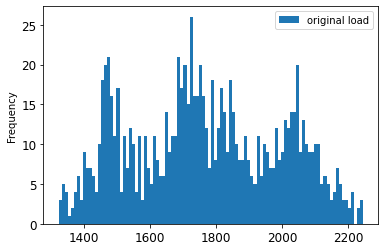

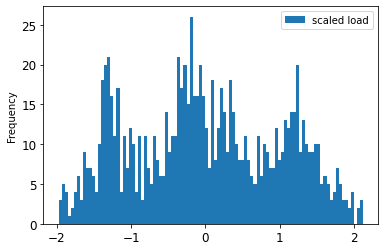

In [21]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-0.680825,0.409530,0.426029,-1.658081,1.441195,-1.22847,-0.305066,-0.079542,0.208761,-0.720968,-0.811405,-0.770690,-0.198499,-0.979125
7202,-0.814392,0.315941,0.514595,-1.658081,1.441195,-1.22847,-0.282772,-0.012621,0.235532,-0.791521,-0.820250,-0.775147,-0.291351,-1.126049
7203,-0.894533,0.222352,0.603162,-1.658081,1.441195,-1.22847,-0.438832,-0.075081,0.123984,-0.848845,-0.820250,-0.944521,-0.381460,-1.085979
7204,-0.898985,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.594893,-0.164310,0.007974,-0.972313,-0.860052,-0.944521,-0.461775,-1.148311
7205,-0.988030,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.684070,-0.307076,-0.081264,-1.020818,-0.935233,-1.038122,-0.542090,-1.166120
7206,-1.175024,0.163035,0.662866,-1.513750,1.441195,-1.22847,-0.817837,-0.284769,-0.014335,-1.100190,-1.023682,-1.109438,-0.644736,-1.170572
7207,-1.232903,0.103718,0.722570,-1.513750,1.441195,-1.22847,-0.898096,-0.440919,-0.076802,-1.135467,-1.090018,-1.087152,-0.746990,-1.192833
7208,-1.255164,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.902555,-0.597070,-0.166041,-1.228068,-1.182889,-1.154010,-0.843368,-1.255164
7209,-1.308591,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.991733,-0.686299,-0.308822,-1.250116,-1.182889,-1.185210,-0.931910,-1.272973
7210,-1.326400,0.073400,0.912626,-1.369419,1.441195,-1.22847,-1.179005,-0.820142,-0.286512,-1.232477,-1.205001,-1.211953,-1.023978,-1.277426


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7201,-0.680825,0.409530,0.426029,-1.658081,1.441195,-1.22847,-0.305066,-0.079542,0.208761,-0.720968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.680825
7202,-0.814392,0.315941,0.514595,-1.658081,1.441195,-1.22847,-0.282772,-0.012621,0.235532,-0.791521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.680825,-0.814392
7203,-0.894533,0.222352,0.603162,-1.658081,1.441195,-1.22847,-0.438832,-0.075081,0.123984,-0.848845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.680825,-0.814392,-0.894533
7204,-0.898985,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.594893,-0.164310,0.007974,-0.972313,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.680825,-0.814392,-0.894533,-0.898985
7205,-0.988030,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.684070,-0.307076,-0.081264,-1.020818,...,NaN,NaN,NaN,NaN,NaN,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030
7206,-1.175024,0.163035,0.662866,-1.513750,1.441195,-1.22847,-0.817837,-0.284769,-0.014335,-1.100190,...,NaN,NaN,NaN,NaN,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030,-1.175024
7207,-1.232903,0.103718,0.722570,-1.513750,1.441195,-1.22847,-0.898096,-0.440919,-0.076802,-1.135467,...,NaN,NaN,NaN,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030,-1.175024,-1.232903
7208,-1.255164,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.902555,-0.597070,-0.166041,-1.228068,...,NaN,NaN,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030,-1.175024,-1.232903,-1.255164
7209,-1.308591,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.991733,-0.686299,-0.308822,-1.250116,...,NaN,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030,-1.175024,-1.232903,-1.255164,-1.308591
7210,-1.326400,0.073400,0.912626,-1.369419,1.441195,-1.22847,-1.179005,-0.820142,-0.286512,-1.232477,...,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030,-1.175024,-1.232903,-1.255164,-1.308591,-1.326400


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7211,-1.272973,0.043082,1.102682,-1.369419,1.441195,-1.22847,-1.236971,-0.900448,-0.442680,-1.280983,...,-0.814392,-0.894533,-0.898985,-0.988030,-1.175024,-1.232903,-1.255164,-1.308591,-1.326400,-1.272973
7212,-1.246260,0.043082,1.102682,-1.225087,1.441195,-1.22847,-1.259265,-0.904910,-0.598847,-1.280983,...,-0.894533,-0.898985,-0.988030,-1.175024,-1.232903,-1.255164,-1.308591,-1.326400,-1.272973,-1.246260
7213,-1.299687,0.043082,1.102682,-1.225087,1.441195,-1.22847,-1.312771,-0.994139,-0.688085,-1.316259,...,-0.898985,-0.988030,-1.175024,-1.232903,-1.255164,-1.308591,-1.326400,-1.272973,-1.246260,-1.299687
7214,-1.290782,0.000901,1.120850,-1.225087,1.441195,-1.22847,-1.330607,-1.181519,-0.821943,-1.333897,...,-0.988030,-1.175024,-1.232903,-1.255164,-1.308591,-1.326400,-1.272973,-1.246260,-1.299687,-1.290782
7215,-1.313044,-0.041280,1.139018,-1.225087,1.441195,-1.22847,-1.277100,-1.239518,-0.902257,-1.311849,...,-1.175024,-1.232903,-1.255164,-1.308591,-1.326400,-1.272973,-1.246260,-1.299687,-1.290782,-1.313044


In [25]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7211,-1.286330
7212,-1.317496
7213,-1.353114
7214,-1.308591
7215,-1.259617
...,...
8057,-0.671920
8058,-0.809940
8059,-0.872271
8060,-1.001386


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
7211,-1.272973,-1.272973,-1.326400,-1.308591,-1.255164,-1.232903,-1.175024,-0.988030,-0.898985,-0.894533,...,-1.369419,1.441195,-1.22847,-1.236971,-0.900448,-0.442680,-1.280983,-1.213846,-1.220868,-1.097632
7212,-1.246260,-1.246260,-1.272973,-1.326400,-1.308591,-1.255164,-1.232903,-1.175024,-0.988030,-0.898985,...,-1.225087,1.441195,-1.22847,-1.259265,-0.904910,-0.598847,-1.280983,-1.253648,-1.238697,-1.155224
7213,-1.299687,-1.299687,-1.246260,-1.272973,-1.326400,-1.308591,-1.255164,-1.232903,-1.175024,-0.988030,...,-1.225087,1.441195,-1.22847,-1.312771,-0.994139,-0.688085,-1.316259,-1.231536,-1.260983,-1.209681
7214,-1.290782,-1.290782,-1.299687,-1.246260,-1.272973,-1.326400,-1.308591,-1.255164,-1.232903,-1.175024,...,-1.225087,1.441195,-1.22847,-1.330607,-1.181519,-0.821943,-1.333897,-1.306717,-1.336755,-1.251601
7215,-1.313044,-1.313044,-1.290782,-1.299687,-1.246260,-1.272973,-1.326400,-1.308591,-1.255164,-1.232903,...,-1.225087,1.441195,-1.22847,-1.277100,-1.239518,-0.902257,-1.311849,-1.289027,-1.376870,-1.288429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,-1.041457,-1.041457,-0.992482,-0.876724,-0.765418,-0.676373,-0.569519,-0.489378,-0.422595,-0.431499,...,1.517204,-1.256834,-1.22847,-0.679612,-0.436458,-0.009873,-0.584272,-0.665465,-0.338340,-0.614960
8058,-0.992482,-0.992482,-1.041457,-0.992482,-0.876724,-0.765418,-0.676373,-0.569519,-0.489378,-0.422595,...,1.517204,-1.256834,-1.22847,-0.768789,-0.427535,-0.188350,-0.438756,-0.603551,-0.324968,-0.686264
8059,-1.032552,-1.032552,-0.992482,-1.041457,-0.992482,-0.876724,-0.765418,-0.676373,-0.569519,-0.489378,...,1.517204,-1.256834,-1.22847,-0.880261,-0.494457,-0.219584,-0.438756,-0.683155,-0.382912,-0.758352
8060,-1.050361,-1.050361,-1.032552,-0.992482,-1.041457,-0.992482,-0.876724,-0.765418,-0.676373,-0.569519,...,1.661535,-1.256834,-1.22847,-0.996191,-0.574763,-0.299898,-0.553405,-0.731801,-0.485428,-0.824954


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(851, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(851,2,1,12)
print(X_valid.shape)

(851, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=1),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=2)))
#model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=4)))
#model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=8)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.3))
#model.add(TimeDistributed(Conv1D(filters=512, kernel_size=1, activation='relu')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))

model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add(Bidirectional(LSTM(64,activation='linear')))

#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.0001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 128)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 117,121
Trainable params: 117,121
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()


history = model.fit(X_train,
          y_train,
          batch_size=400,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
18/18 [==============================] - 1s 54ms/step - loss: 0.8614 - val_loss: 0.7557
Epoch 2/300
18/18 [==============================] - 0s 21ms/step - loss: 0.6893 - val_loss: 0.6380
Epoch 3/300
18/18 [==============================] - 0s 21ms/step - loss: 0.6096 - val_loss: 0.5845
Epoch 4/300
18/18 [==============================] - 0s 21ms/step - loss: 0.5676 - val_loss: 0.5294
Epoch 5/300
18/18 [==============================] - 0s 21ms/step - loss: 0.5245 - val_loss: 0.4693
Epoch 6/300
18/18 [==============================] - 0s 21ms/step - loss: 0.4805 - val_loss: 0.4077
Epoch 7/300
18/18 [==============================] - 0s 21ms/step - loss: 0.4404 - val_loss: 0.3476
Epoch 8/300
18/18 [==============================] - 0s 21ms/step - loss: 0.4094 - val_loss: 0.3015
Epoch 9/300
18/18 [==============================] - 0s 21ms/step - loss: 0.3895 - val_loss: 0.2687
Epoch 10/300
18/18 [==============================] - 0s 22ms/step - loss: 0.3758 - val_loss: 0.2473

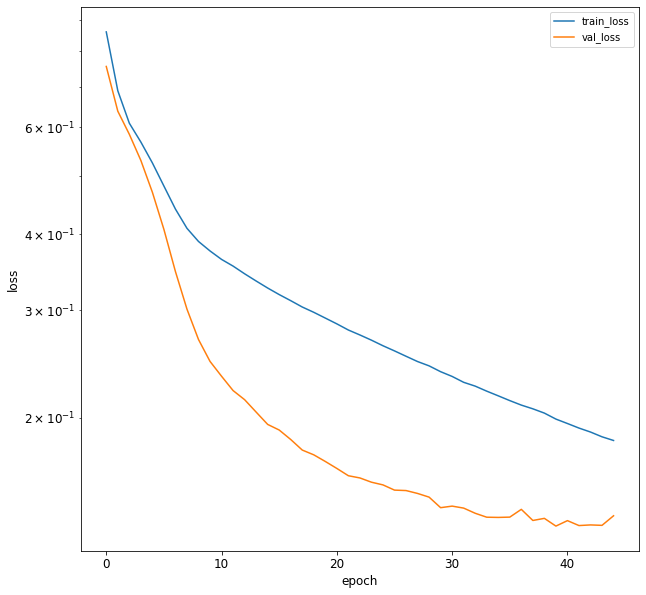

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,1517.0,15.227452,82.212390,1.0,3.0,1.0,1586.0,1688.0,1744.0,1404.0,1541.0,1520.0,1620.416667
8163,1505.0,15.102452,82.980680,1.0,3.0,1.0,1572.0,1662.0,1704.0,1403.0,1525.0,1501.0,1603.833333
8164,1490.0,15.102452,82.980680,2.0,3.0,1.0,1543.0,1639.0,1687.0,1347.0,1522.0,1500.0,1587.416667
8165,1462.0,15.102452,82.980680,2.0,3.0,1.0,1528.0,1617.0,1702.0,1370.0,1497.0,1482.0,1567.416667
8166,1458.0,15.172452,83.207925,2.0,3.0,1.0,1517.0,1586.0,1688.0,1361.0,1478.0,1473.0,1548.250000
8167,1455.0,15.242452,83.435170,2.0,3.0,1.0,1505.0,1572.0,1662.0,1356.0,1474.0,1459.0,1531.000000
8168,1455.0,15.242452,83.435170,3.0,3.0,1.0,1490.0,1543.0,1639.0,1343.0,1467.0,1450.0,1515.666667
8169,1441.0,15.242452,83.435170,3.0,3.0,1.0,1462.0,1528.0,1617.0,1340.0,1446.0,1418.0,1501.000000
8170,1442.0,14.857452,86.310845,3.0,3.0,1.0,1458.0,1517.0,1586.0,1335.0,1420.0,1428.0,1489.000000
8171,1429.0,14.472452,89.186520,3.0,3.0,1.0,1455.0,1505.0,1572.0,1331.0,1422.0,1419.0,1477.083333


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


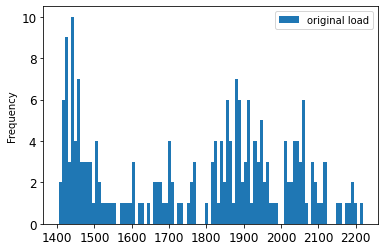

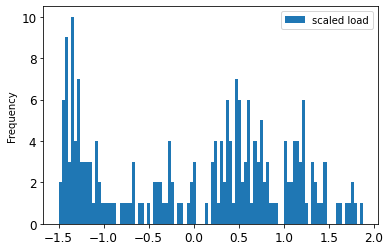

In [36]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,-1.031188,-0.843912,0.279551,-1.498364,-1.004934,0.340279,-0.759358,-0.358631,-0.146469,-1.357378,-0.581660,-0.721890,-0.663175,-1.259047
8163,-1.080903,-0.891049,0.330679,-1.498364,-1.004934,0.340279,-0.817846,-0.469312,-0.320377,-1.361427,-0.660779,-0.805196,-0.736720,-1.263190
8164,-1.143046,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-0.939000,-0.567223,-0.394289,-1.588130,-0.675614,-0.809581,-0.809527,-1.308762
8165,-1.259047,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-1.001665,-0.660876,-0.329073,-1.495020,-0.799237,-0.888503,-0.898226,-1.329476
8166,-1.275619,-0.864652,0.345802,-1.357685,-1.004934,0.340279,-1.047620,-0.792843,-0.389941,-1.531455,-0.893191,-0.927964,-0.983228,-1.337762
8167,-1.288047,-0.838255,0.360925,-1.357685,-1.004934,0.340279,-1.097753,-0.852441,-0.502981,-1.551696,-0.912971,-0.989347,-1.059731,-1.325333
8168,-1.288047,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.160418,-0.975893,-0.602979,-1.604324,-0.947585,-1.028808,-1.127733,-1.354333
8169,-1.346048,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.277394,-1.039748,-0.698629,-1.616468,-1.051429,-1.169114,-1.192779,-1.420620
8170,-1.341905,-0.983438,0.552298,-1.217006,-1.004934,0.340279,-1.294105,-1.086575,-0.833408,-1.636710,-1.179997,-1.125268,-1.245998,-1.354333
8171,-1.395762,-1.128622,0.743671,-1.217006,-1.004934,0.340279,-1.306638,-1.137658,-0.894276,-1.652903,-1.170107,-1.164729,-1.298847,-1.416477


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8162,-1.031188,-0.843912,0.279551,-1.498364,-1.004934,0.340279,-0.759358,-0.358631,-0.146469,-1.357378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.031188
8163,-1.080903,-0.891049,0.330679,-1.498364,-1.004934,0.340279,-0.817846,-0.469312,-0.320377,-1.361427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.031188,-1.080903
8164,-1.143046,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-0.939000,-0.567223,-0.394289,-1.588130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.031188,-1.080903,-1.143046
8165,-1.259047,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-1.001665,-0.660876,-0.329073,-1.495020,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.031188,-1.080903,-1.143046,-1.259047
8166,-1.275619,-0.864652,0.345802,-1.357685,-1.004934,0.340279,-1.047620,-0.792843,-0.389941,-1.531455,...,NaN,NaN,NaN,NaN,NaN,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619
8167,-1.288047,-0.838255,0.360925,-1.357685,-1.004934,0.340279,-1.097753,-0.852441,-0.502981,-1.551696,...,NaN,NaN,NaN,NaN,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619,-1.288047
8168,-1.288047,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.160418,-0.975893,-0.602979,-1.604324,...,NaN,NaN,NaN,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619,-1.288047,-1.288047
8169,-1.346048,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.277394,-1.039748,-0.698629,-1.616468,...,NaN,NaN,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619,-1.288047,-1.288047,-1.346048
8170,-1.341905,-0.983438,0.552298,-1.217006,-1.004934,0.340279,-1.294105,-1.086575,-0.833408,-1.636710,...,NaN,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619,-1.288047,-1.288047,-1.346048,-1.341905
8171,-1.395762,-1.128622,0.743671,-1.217006,-1.004934,0.340279,-1.306638,-1.137658,-0.894276,-1.652903,...,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619,-1.288047,-1.288047,-1.346048,-1.341905,-1.395762


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8172,-1.416477,-1.128622,0.743671,-1.076327,-1.004934,0.340279,-1.306638,-1.201513,-1.020359,-1.592179,...,-1.080903,-1.143046,-1.259047,-1.275619,-1.288047,-1.288047,-1.346048,-1.341905,-1.395762,-1.416477
8173,-1.404048,-1.128622,0.743671,-1.076327,-1.004934,0.340279,-1.365126,-1.320709,-1.085575,-1.624565,...,-1.143046,-1.259047,-1.275619,-1.288047,-1.288047,-1.346048,-1.341905,-1.395762,-1.416477,-1.404048
8174,-1.391619,-1.132393,0.767037,-1.076327,-1.004934,0.340279,-1.360948,-1.337737,-1.133400,-1.628613,...,-1.259047,-1.275619,-1.288047,-1.288047,-1.346048,-1.341905,-1.395762,-1.416477,-1.404048,-1.391619
8175,-1.408191,-1.136164,0.790404,-1.076327,-1.004934,0.340279,-1.415259,-1.350508,-1.185573,-1.681241,...,-1.275619,-1.288047,-1.288047,-1.346048,-1.341905,-1.395762,-1.416477,-1.404048,-1.391619,-1.408191
8176,-1.433048,-1.136164,0.790404,-0.935648,-1.004934,0.340279,-1.436147,-1.350508,-1.250788,-1.681241,...,-1.288047,-1.288047,-1.346048,-1.341905,-1.395762,-1.416477,-1.404048,-1.391619,-1.408191,-1.433048


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8172,-1.404048
8173,-1.408191
8174,-1.337762
8175,-1.296333
8176,-1.172046
...,...
8269,-1.424763
8270,-1.441334
8271,-1.300476
8272,-1.230047


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
8172,-1.416477,-1.416477,-1.395762,-1.341905,-1.346048,-1.288047,-1.288047,-1.275619,-1.259047,-1.143046,...,-1.076327,-1.004934,0.340279,-1.306638,-1.201513,-1.020359,-1.592179,-1.189887,-1.177883,-1.342827
8173,-1.404048,-1.404048,-1.416477,-1.395762,-1.341905,-1.346048,-1.288047,-1.288047,-1.275619,-1.259047,...,-1.076327,-1.004934,0.340279,-1.365126,-1.320709,-1.085575,-1.624565,-1.209667,-1.177883,-1.380154
8174,-1.391619,-1.391619,-1.404048,-1.416477,-1.395762,-1.341905,-1.346048,-1.288047,-1.288047,-1.275619,...,-1.076327,-1.004934,0.340279,-1.360948,-1.337737,-1.133400,-1.628613,-1.254171,-1.204190,-1.412307
8175,-1.408191,-1.408191,-1.391619,-1.404048,-1.416477,-1.395762,-1.341905,-1.346048,-1.288047,-1.288047,...,-1.076327,-1.004934,0.340279,-1.415259,-1.350508,-1.185573,-1.681241,-1.288786,-1.243651,-1.441504
8176,-1.433048,-1.433048,-1.408191,-1.391619,-1.404048,-1.416477,-1.395762,-1.341905,-1.346048,-1.288047,...,-0.935648,-1.004934,0.340279,-1.436147,-1.350508,-1.250788,-1.681241,-1.254171,-1.326958,-1.467374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-1.420620,-1.420620,-1.354333,-1.325333,-1.337762,-1.329476,-1.308762,-1.263190,-1.259047,-1.205189,...,-1.076327,0.516823,0.340279,-1.348415,-1.265368,-1.094271,-1.264268,-1.585482,-1.186652,-1.364632
8270,-1.354333,-1.354333,-1.420620,-1.354333,-1.325333,-1.337762,-1.329476,-1.308762,-1.263190,-1.259047,...,-1.076327,0.516823,0.340279,-1.356771,-1.320709,-1.168182,-1.252123,-1.590427,-1.226113,-1.390502
8271,-1.416477,-1.416477,-1.354333,-1.420620,-1.354333,-1.325333,-1.337762,-1.329476,-1.308762,-1.263190,...,-1.076327,0.516823,0.340279,-1.344238,-1.324966,-1.189920,-1.268316,-1.654711,-1.256805,-1.420068
8272,-1.404048,-1.404048,-1.416477,-1.354333,-1.420620,-1.354333,-1.325333,-1.337762,-1.329476,-1.308762,...,-0.935648,0.516823,0.340279,-1.373482,-1.371792,-1.250788,-1.292606,-1.654711,-1.226113,-1.443352


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,2,1,12)

In [45]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.606034517288208s


In [46]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1765.90566
dtype: float64
Cons    241.948842
dtype: float64


In [47]:
load_mean=1765.90566
load_std=241.948842
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+100
8172,1426.197855
8173,1425.195488
8174,1442.235725
8175,1452.259394
8176,1482.330400
...,...
8269,1421.186021
8270,1417.176553
8271,1451.257027
8272,1468.297264


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1481.3448],
       [1490.9778],
       [1496.3132],
       [1499.0126],
       [1516.3821],
       [1544.732 ],
       [1566.8436],
       [1592.4623],
       [1639.6627],
       [1691.3386],
       [1758.643 ],
       [1844.1031],
       [1920.3837],
       [1966.9572],
       [2000.1621],
       [2039.3235],
       [2059.2659],
       [2084.0305],
       [2109.2427],
       [2098.8218],
       [2094.359 ],
       [2113.8818],
       [2122.9612],
       [2101.881 ],
       [2082.493 ],
       [2058.941 ],
       [1983.5663],
       [1908.5133],
       [1924.81  ],
       [1928.2871],
       [1940.4482],
       [1928.8451],
       [1936.8282],
       [1937.3951],
       [1933.0083],
       [1933.8258],
       [1959.4948],
       [1967.858 ],
       [1973.9084],
       [1968.0753],
       [2002.2985],
       [1989.8981],
       [1981.7944],
       [1986.5015],
       [1999.7269],
       [2005.6627],
       [2032.2362],
       [2028.6575],
       [2024.1478],
       [2011.332 ],


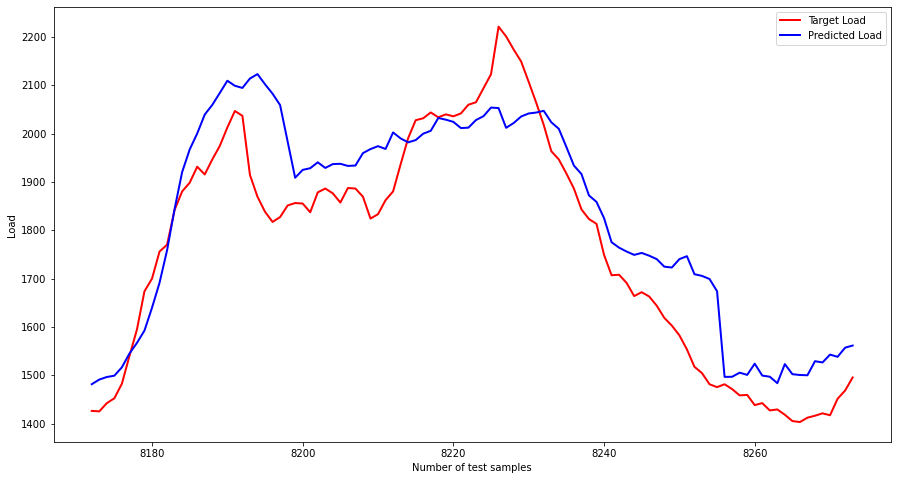

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

4.937525287684925


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -3.649979
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8172  142515.918807
8173  142414.933166
8174  144119.822946
8175  145122.720033
8176  148130.742801
...             ...
8269  142011.197606
8270  141608.802343
8271  145019.720093
8272  146723.687116
8273  149431.699639

[102 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8172   3041.190884
8173   4327.310317
8174   2924.376801
8175   2185.859794
8176   1159.516935
...            ...
8269  11073.660088
8270  15740.865691
8271   7538.199836
8272   7863.087122
8273   4363.129878

[102 rows x 1 columns]
y_t+100    10684.820448
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    103.367405
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1481.3448]
[1490.9778]
[1496.3132]
[1499.0126]
[1516.3821]
[1544.732]
[1566.8436]
[1592.4623]
[1639.6627]
[1691.3386]
[1758.643]
[1844.1031]
[1920.3837]
[1966.9572]
[2000.1621]
[2039.3235]
[2059.2659]
[2084.0305]
[2109.2427]
[2098.8218]
[2094.359]
[2113.8818]
[2122.9612]
[2101.881]
[2082.493]
[2058.941]
[1983.5663]
[1908.5133]
[1924.81]
[1928.2871]
[1940.4482]
[1928.8451]
[1936.8282]
[1937.3951]
[1933.0083]
[1933.8258]
[1959.4948]
[1967.858]
[1973.9084]
[1968.0753]
[2002.2985]
[1989.8981]
[1981.7944]
[1986.5015]
[1999.7269]
[2005.6627]
[2032.2362]
[2028.6575]
[2024.1478]
[2011.332]
[2012.1667]
[2027.9302]
[2035.9279]
[2053.7441]
[2052.7002]
[2011.8579]
[2021.7246]
[2035.3026]
[2041.5524]
[2043.4521]
[2046.977]
[2023.3118]
[2009.7484]
[1972.2792]
[1933.7267]
[1916.2325]
[1871.8984]
[1858.5928]
[1825.0502]
[1775.1465]
[1763.8666]
[1755.8488]
[1748.9456]
[1752.9757]
[1747.2465]
[1740.1366]
[1724.573]
[1722.8053]
[1740.0979]
[1746.2863]
[1708.9935]
[1705.5002]
[1699.0632]
[1673.8705]
[149